<a href="https://colab.research.google.com/github/DaiVo20/Stock-Price-Prediction/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

# Read the AirPassengers dataset
df = pd.read_csv('/content/stock_data.csv',
					index_col ='Date',)

# Print the first five rows of the dataset
df.head()

,Open,High,Low,Close,Volume,OpenInt,Stock
Date,,,,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [2]:
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")

In [3]:
companies = df['Stock'].unique()
stock ={}
for i in companies:
  stock[i] = df[df['Stock'] == i]['Close']

In [41]:
#Checking For Stationarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [86]:
#substract data for stationarity
FB_diff=stock['FB'].diff()
AAPL_diff=stock['AAPL'].diff()
MSFT_diff=stock['MSFT'].diff()
TSLA_diff=stock['TSLA'].diff()

In [87]:
FB_diff=FB_diff.dropna()
AAPL_diff=AAPL_diff.dropna()
MSFT_diff=MSFT_diff.dropna()
TSLA_diff=TSLA_diff.dropna()

In [93]:
#get d term
from pmdarima.arima.utils import ndiffs
ndiffs(stock['FB'],test='adf')

1

In [90]:
ndiffs(stock['AAPL'],test='adf')

1

In [91]:
ndiffs(stock['MSFT'],test='adf')

1

In [92]:
ndiffs(stock['TSLA'],test='adf')

1

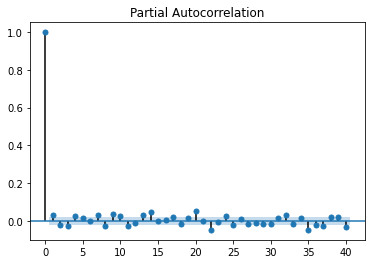

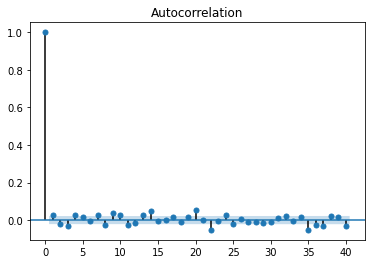

In [99]:
plot_pacf(AAPL_diff); #AAPL:p=1,q=1
plot_acf(AAPL_diff);

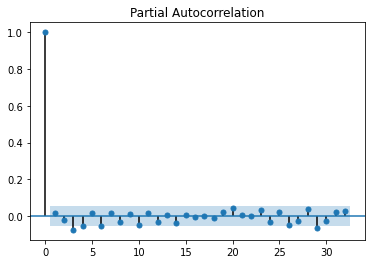

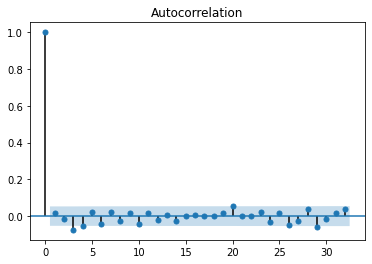

In [101]:
plot_pacf(FB_diff);#FB:p,q=3
plot_acf(FB_diff);

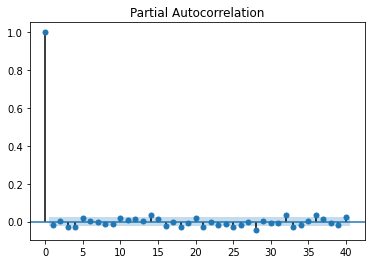

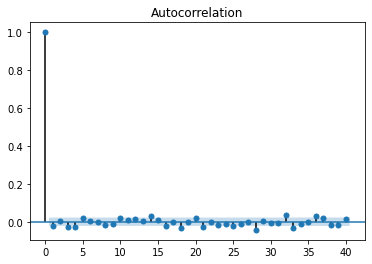

In [103]:
plot_pacf(MSFT_diff);#MSFT:p,q=3
plot_acf(MSFT_diff);

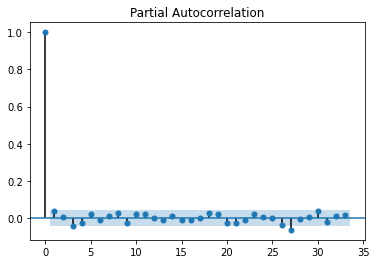

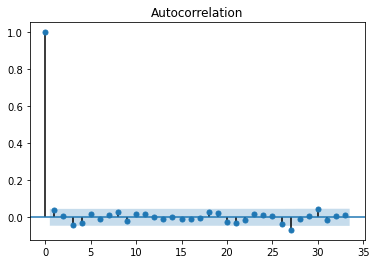

In [104]:
plot_pacf(TSLA_diff);#TSLA:p,q=3
plot_acf(TSLA_diff);

In [4]:
def SplitData(data):#80-20
  train=data.iloc[:-int(len(data)*0.2)]
  test=data.iloc[-int(len(data)*0.2):]
  return train,test

In [5]:
AAPL_train,AAPL_test=SplitData(stock['AAPL'])
TSLA_train,TSLA_test=SplitData(stock['TSLA'])
MSFT_train,MSFT_test=SplitData(stock['MSFT'])
FB_train,FB_test=SplitData(stock['FB'])

In [7]:
def Model(train,order):
  model=ARIMA(train,order=order)
  model=model.fit(disp=0)
  return model;

In [8]:
AAPL_Model=Model(AAPL_train,(1,1,1))
FB_Model=Model(FB_train,(3,1,3))
MSFT_Model=Model(MSFT_train,(3,1,3))
TSLA_Model=Model(TSLA_train,(3,1,3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [20]:
#visualize predictions
def Plot_Predictions(model,train,test):
  start=len(train)
  end=len(train) + len(test) - 1
  predictions=model.predict(start,end,typ='levels').rename("Predictions")
  predictions.index=test.index
  predictions.plot(legend = True,figsize=(20,12))
  test.plot(legend = True)
  train.plot(legend = True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


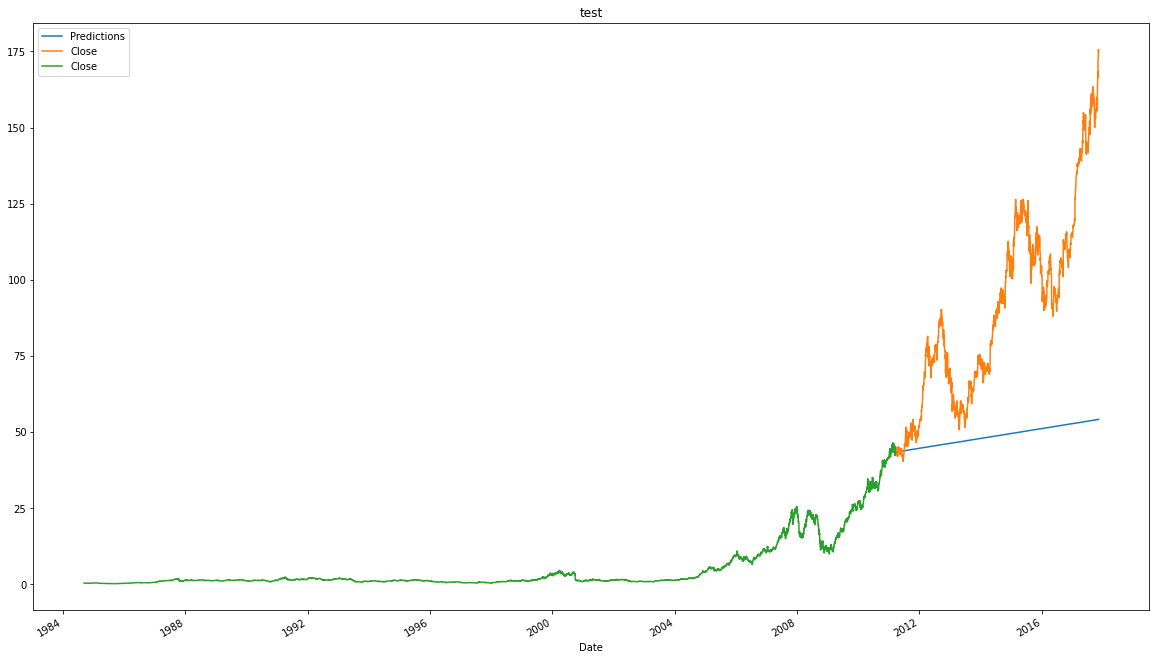

In [19]:
Plot_Predictions(AAPL_Model,AAPL_train,AAPL_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


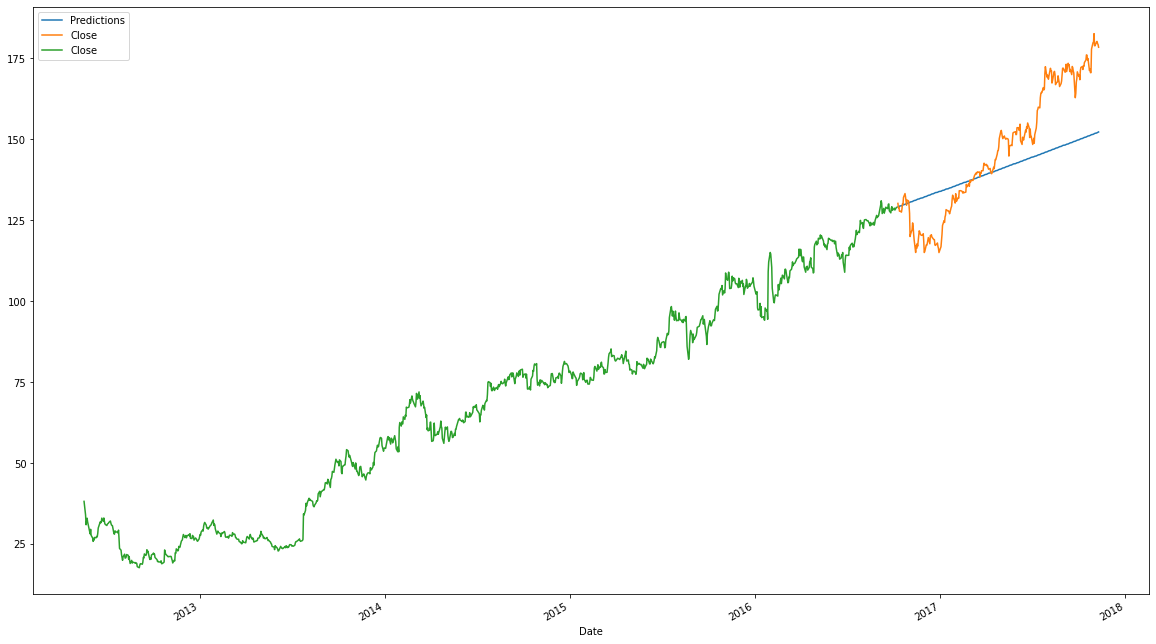

In [12]:
Plot_Predictions(FB_Model,FB_train,FB_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


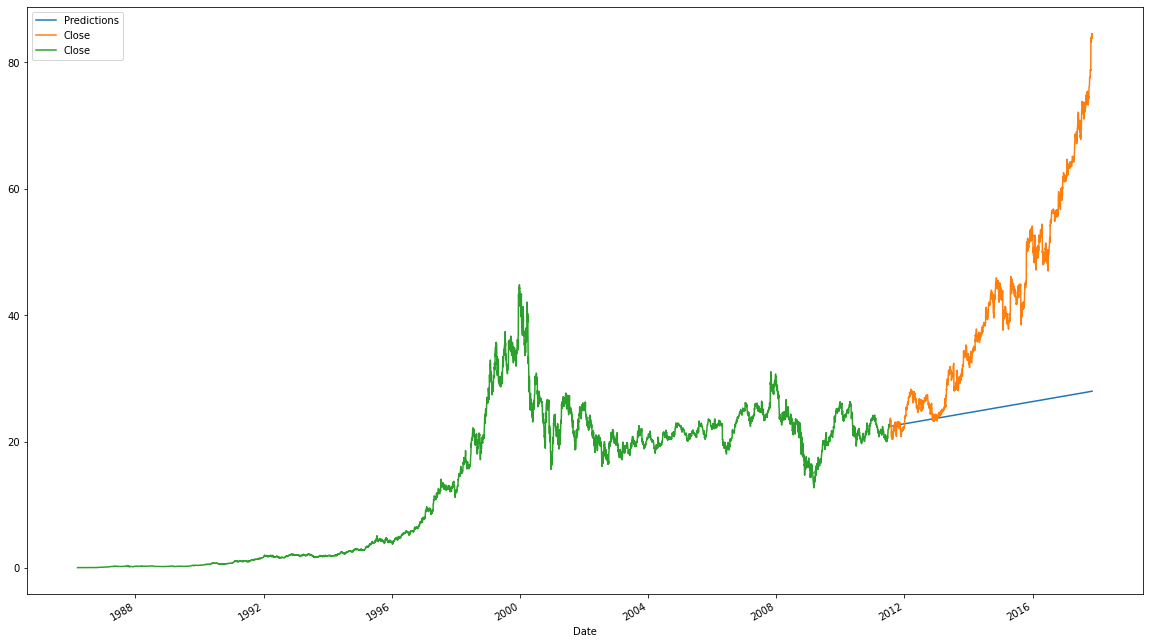

In [13]:
Plot_Predictions(MSFT_Model,MSFT_train,MSFT_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


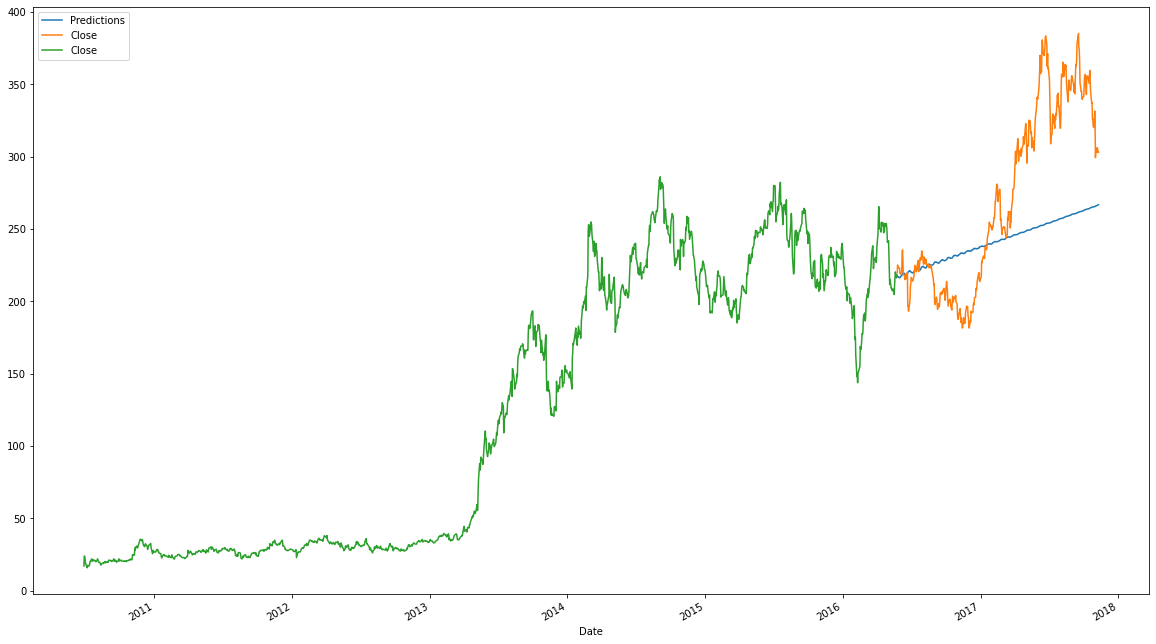

In [21]:
Plot_Predictions(TSLA_Model,TSLA_train,TSLA_test)

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#RMSE
def RMSE(model,train_data,test_data):
  start=len(train_data)
  end=len(train_data)+len(test_data)-1
  pred=model.predict(start=start,end=end,typ='levels')
  test_data.mean()
  rmse=sqrt(mean_squared_error(pred,test_data))
  return rmse

In [24]:
RMSE(FB_Model,FB_train,FB_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


14.331232707438073

In [25]:
RMSE(AAPL_Model,AAPL_train,AAPL_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


50.679161018310275

In [26]:
RMSE(MSFT_Model,MSFT_train,MSFT_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


21.38233097573855

In [27]:
RMSE(TSLA_Model,TSLA_train,TSLA_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


57.68100116171794